In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import geopy.distance
df = pd.read_parquet("winddata/full_data.parquet")
# print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'winddata/full_data.parquet'

In [25]:
df_filtered = df[~df.loc_longitude.isna()]
df_filtered.tbdata_power_curve = df_filtered.tbdata_power_curve.apply(lambda x: np.stack(x) if x is not None else None)

# df_filtered_with_turbine=df_filtered_with_turbine.loc[:,["gen_name","details_nominal_power_kw","tbdata_gen_ratedpower_kw","tbdata_power_curve","url"]]

# SELECT LOCATION------------------------- the countries will be the ones icluded in the REALISE D2.2 (Balmorel investmen optimization)
# Germany is analysed regionally to consider transmission bottlenecks. (diff price zones)
# # 1. Germany: DE4-S (BDH)
# point = (49.217226868,	9.210566574)
# # 2. Germany: DE4-E (BENZ)
# point = (53.939113,	14.084473)
# # 3. Poland: PL (Zary VA)
# point = (52.083961944,	15.272597423)
# # 4. Finland: Uki (VA)
# point = (60.812663209,	21.444728425)
# # 5. Netherlands. Offshore (Vlieland, Frisia)
# point = (53.250426,	5.063324)
# # 6. Belgium. Onshore: Sint-Maria-Horebeke
# point = (50.823722,	3.69278)
# # 7. DK2. Onshore
# point = (55.712607,	11.103058)
# # 8. DK2 Offshore
# point = (55.675261, 10.875092)
# # 9. DE4-S (Super Low Wind)
# point = (47.640965, 11.589237)
# # 10. PL (Super Low Wind)
# point = (50.013034, 19.931001)

# ----------------------------------------

df_filtered["distance_to_point"] = df_filtered.apply(lambda row: geopy.distance.geodesic((row.loc_latitude, row.loc_longitude), point).meters, axis=1)
df_15_closest_farms_point = df_filtered.sort_values(by="distance_to_point").head(10)

df_dist=df_15_closest_farms_point.loc[:,["gen_name","loc_latitude","loc_longitude","distance_to_point"]]
# df_dist = df_dist.drop_duplicates()
df_dist
# df_15_closest_farms_point
# print("The plants {}, {} and {} are the closest to the chosen location".format(df_15_closest_farms_point.gen_name(1), df_15_closest_farms_point.gen_name(2), df_15_closest_farms_point.gen_name(3)))

C:\Users\ngt13\AppData\Local\Temp\ipykernel_19936\1569676523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.tbdata_power_curve = df_filtered.tbdata_power_curve.apply(lambda x: np.stack(x) if x is not None else None)
C:\Users\ngt13\AppData\Local\Temp\ipykernel_19936\1569676523.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["distance_to_point"] = df_filtered.apply(lambda row: geopy.distance.geodesic((row.loc_latitude, row.loc_longitude), point).meters, axis=1)


,gen_name,loc_latitude,loc_longitude,distance_to_point
15021,Berg (Bayern),47.981722,11.408694,40228.335068
9943,Berg (Bayern),47.981722,11.408694,40228.335068
29477,Berg (Bayern),47.981722,11.408694,40228.335068
36780,Berg (Bayern),47.981722,11.408694,40228.335068
25580,Berg (Bayern),47.981722,11.408694,40228.335068
10544,Osterkling,48.011417,11.952167,49345.833379
9655,Peiting,47.783139,10.94875,50594.565193
39123,Fröttmaning,48.214194,11.630472,63811.203296
39122,Fröttmaning,48.214194,11.630472,63811.203296
7175,Fröttmaning,48.214194,11.630472,63811.203296


In [5]:
df_dist.columns

Index(['gen_name', 'loc_latitude', 'loc_longitude', 'distance_to_point'], dtype='object')

In [26]:
df_15_closest_farms_point_with_turbine = df_15_closest_farms_point.copy()[~df_15_closest_farms_point.tbdata_power_curve.isna()]
df_15_closest_farms_point_with_turbine.columns

Index(['gen_zone', 'gen_country', 'gen_name', 'loc_latitude', 'loc_longitude',
       'details_operator', 'details_turbine', 'details_n_turbine',
       'details_operational', 'details_is_offshore', 'url', 'loc_elevation',
       'details_nominal_power_kw', 'tbdata_gen_manu', 'tbdata_gen_model',
       'tbdata_gen_windclass', 'tbdata_gen_is_offshore', 'tbdata_gen_n_blades',
       'tbdata_gen_power_control', 'tbdata_gen_commissioning ',
       'tbdata_gear_uses_box', 'tbdata_gear_stages', 'tbdata_gear_ratio',
       'tbdata_generator_type', 'tbdata_generator_num',
       'tbdata_generator_max_speed', 'tbdata_generator_voltage_min',
       'tbdata_generator_voltage_max', 'tbdata_power_curve', 'tbdata_url',
       'tbdata_gen_commissioning', 'tbdata_gen_ratedpower_kw',
       'tbdata_gen_rotor_diameter_m', 'tbdata_gen_specific_area_msq_kw',
       'tbdata_gen_swept_area_msq', 'tbdata_rotor_min_speed_rpm',
       'tbdata_rotor_max_speed_rpm', 'tbdata_rotor_cut_off_windspeed_m_s',
       '

15021
9943
29477
36780
25580
10544
9655
39123
39122
7175


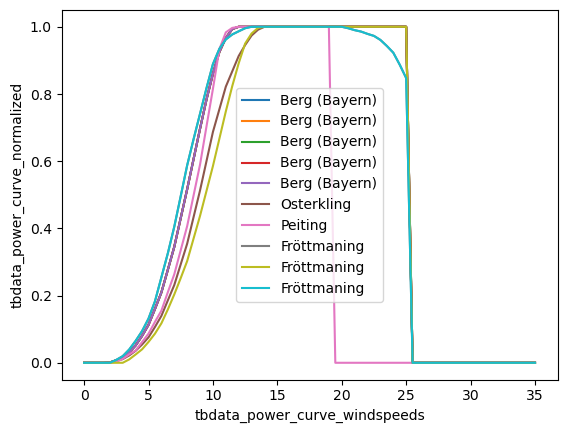

In [27]:
df_15_closest_farms_point_with_turbine["tbdata_power_curve_normalized"] = df_15_closest_farms_point_with_turbine.apply(
    lambda row: (row.tbdata_power_curve[:,1] / row.tbdata_gen_ratedpower_kw), axis=1)
df_15_closest_farms_point_with_turbine["tbdata_power_curve_windspeeds"] = df_15_closest_farms_point_with_turbine.apply(
    lambda row: (row.tbdata_power_curve[:,0]), axis=1)



for i, row in df_15_closest_farms_point_with_turbine.iterrows():
    print(i)
    plt.plot(row.tbdata_power_curve_windspeeds, row.tbdata_power_curve_normalized, label=row.gen_name)
plt.xlabel("tbdata_power_curve_windspeeds")
plt.ylabel("tbdata_power_curve_normalized")
plt.legend()

In [28]:
# Power_curves of interest:
# 10. Rymanow 64603, 64495, 64329
display(df_15_closest_farms_point_with_turbine["tbdata_power_curve_normalized"])
power_curve_LW= df_15_closest_farms_point_with_turbine["tbdata_power_curve_normalized"]
# Set the threshold to a large number
np.set_printoptions(threshold=np.inf)
print(df_15_closest_farms_point_with_turbine["tbdata_power_curve_normalized"])

15021    [0.0, 0.0, 0.0, 0.0, 0.001, 0.0073333333333333...
9943     [0.0, 0.0, 0.0, 0.0, 0.001, 0.0073333333333333...
29477    [0.0, 0.0, 0.0, 0.0, 0.001, 0.0073333333333333...
36780    [0.0, 0.0, 0.0, 0.0, 0.001, 0.0073333333333333...
25580    [0.0, 0.0, 0.0, 0.0, 0.001, 0.0073333333333333...
10544    [0.0, 0.0, 0.0, 0.0, 0.0013043478260869566, 0....
9655     [0.0, 0.0, 0.0, 0.0, 0.0, 0.003333333333333333...
39123    [0.0, 0.0, 0.0, 0.0, 0.0, 0.008571428571428572...
39122    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.02...
7175     [0.0, 0.0, 0.0, 0.0, 0.0, 0.008571428571428572...
Name: tbdata_power_curve_normalized, dtype: object

15021    [0.0, 0.0, 0.0, 0.0, 0.001, 0.0073333333333333...
9943     [0.0, 0.0, 0.0, 0.0, 0.001, 0.0073333333333333...
29477    [0.0, 0.0, 0.0, 0.0, 0.001, 0.0073333333333333...
36780    [0.0, 0.0, 0.0, 0.0, 0.001, 0.0073333333333333...
25580    [0.0, 0.0, 0.0, 0.0, 0.001, 0.0073333333333333...
10544    [0.0, 0.0, 0.0, 0.0, 0.0013043478260869566, 0....
9655     [0.0, 0.0, 0.0, 0.0, 0.0, 0.003333333333333333...
39123    [0.0, 0.0, 0.0, 0.0, 0.0, 0.008571428571428572...
39122    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.02...
7175     [0.0, 0.0, 0.0, 0.0, 0.0, 0.008571428571428572...
Name: tbdata_power_curve_normalized, dtype: object


WINDFARM LOCATIONS

In [92]:
# WORLD

fig = px.scatter_geo(df,lat='loc_latitude',lon='loc_longitude', hover_name="details_nominal_power_kw") #, size="size") # , 
fig.update_layout(title = 'World map wind', title_x=0.5)
# fig.show()
print("done")

# GERMANY
df_DE = df.loc[df["gen_country"] == "Germany"]
df_DE_loc = df_DE[["loc_latitude", "loc_longitude","loc_elevation"]]

fig = px.scatter_geo(df_DE,lat='loc_latitude',lon='loc_longitude', hover_name="details_nominal_power_kw") #, size="size") # , 
fig.update_layout(title = 'World map wind', title_x=0.5)
# fig.show()

done
